In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/quora-question-pairs/train.csv.zip
/kaggle/input/quora-question-pairs/sample_submission.csv.zip
/kaggle/input/quora-question-pairs/test.csv
/kaggle/input/quora-question-pairs/test.csv.zip


In [2]:
import zipfile

zip_path = "/kaggle/input/quora-question-pairs/train.csv.zip"
extract_path = "/kaggle/working/"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [3]:
df = pd.read_csv('/kaggle/working/train.csv')
df.shape

(404290, 6)

In [4]:
df = df.sample(30000)

In [5]:
df.info

<bound method DataFrame.info of             id    qid1    qid2  \
61659    61659  107608  107609   
217286  217286  323607  323608   
391859  391859  239329  275724   
203769  203769  306476   80822   
325053  325053  451245  451246   
...        ...     ...     ...   
198912  198912    5723    3261   
267159  267159  384466  384467   
79034    79034  118069  134656   
232283  232283  199613   94939   
291829  291829   85548  368724   

                                                question1  \
61659                         How do I manage a business?   
217286                  How do children develop literacy?   
391859   What are some essential customer service skills?   
203769    What are some recommended equipment for hiking?   
325053  Is it possible to have a Vulkan game engine ru...   
...                                                   ...   
198912  How can I increase traffic to my website using...   
267159  How do I destroy earbuds without visible physi...   
79034     

In [6]:
#missing values
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [7]:
#check for duplicates
df.duplicated().sum()

0

In [8]:
df['is_duplicate'].value_counts()

is_duplicate
0    18876
1    11124
Name: count, dtype: int64

In [9]:
df['is_duplicate'].count()

30000

Text(0, 0.5, 'Frequency')

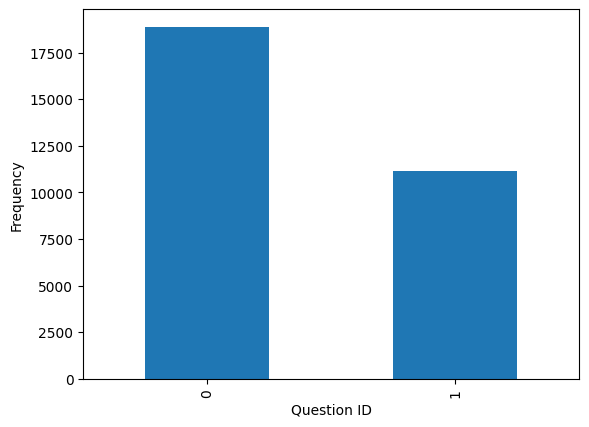

In [10]:
import matplotlib.pyplot as plt
df['is_duplicate'].value_counts().plot(kind='bar')
plt.xlabel("Question ID")
plt.ylabel("Frequency")

In [11]:
# Unique questions
qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print(f'Number of unique questions {np.unique(qid).shape[0]}')

# Repeted questions
x = qid.value_counts()>1
print(f'Number of questions repeated {x[x].shape[0]}')


Number of unique questions 55306
Number of questions repeated 3511


In [12]:
qid.value_counts().values

array([15, 10,  9, ...,  1,  1,  1])

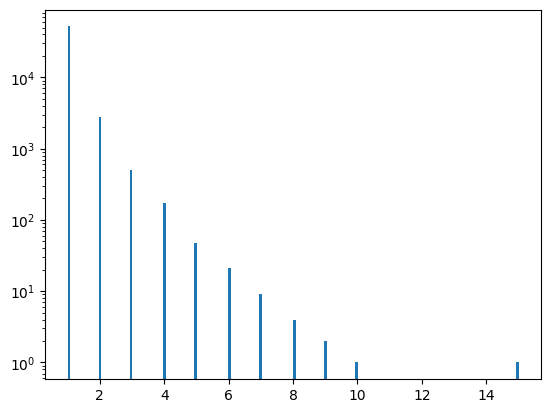

In [13]:
plt.hist(qid.value_counts().values, bins=160)
plt.yscale('log')
plt.show()

qid1 , qid2, question1, question2, is_duplicate <br>
              bow        bow        randomforest

In [14]:
# Feature engineering

In [15]:
ques_df = df[['question1','question2']]
ques_df.head()


,question1,question2
61659,How do I manage a business?,How do I manage the business?
217286,How do children develop literacy?,How children develop literacy?
391859,What are some essential customer service skills?,How do I improve my customer service skills?
203769,What are some recommended equipment for hiking?,What are the essentials for hiking?
325053,Is it possible to have a Vulkan game engine ru...,Is it possible run pc without ROM BIOS chip?


In [16]:
from sklearn.feature_extraction.text import CountVectorizer

# Merge all questions into one list
questions = list(ques_df['question1'].fillna("")) + list(ques_df['question2'].fillna(""))

# Vectorize
cv = CountVectorizer(max_features=3000)
q_vectors = cv.fit_transform(questions).toarray()

# Split back into q1 and q2 arrays
half = len(q_vectors) // 2
q1_arr, q2_arr = np.vsplit(q_vectors, [half])

In [17]:
temp_df1 = pd.DataFrame(q1_arr, index = ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index = ques_df.index)

temp_df = pd.concat([temp_df1,temp_df2],axis=1)
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
61659,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
217286,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
391859,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
203769,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
325053,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198912,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
267159,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79034,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
232283,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
temp_df['is_duplicate'] = df['is_duplicate']
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
61659,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
217286,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
391859,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
203769,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
325053,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198912,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
267159,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79034,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
232283,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [19]:
# EDA


### Data Preprocessing & Transformation


In [20]:
temp_df.iloc[:,0:-1].values

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [21]:
#importing and splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2, random_state=2)



### Model Selection & Evaluation

### Classification Models / Regression Models

In [22]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [23]:
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7475

In [24]:
#Random Forest Classifier
from xgboost import XGBClassifier

xgb = XGBClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [25]:
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7473333333333333

In [26]:
submission = pd.DataFrame({
    'test_id': range(len(y_pred)),    
    'is_duplicate': y_pred
})

submission.to_csv('submission.csv', index=False)

### Model Evaluation Metrics

### Pipelines